# Lab exercise 2: Regression, Least squares, QR 

## Part 2: Curve Fitting to Temperature Data

_SMHI provides a generous dataset containing the evolution of the daily temperature in Uppsala. The dataset contains measurements ranging from the beginning of the meteorological observations in 1722 all the way until 2020. In this part of the lab, we will fit polynomials to this data using the method of least squares._

### 1. Load the dataset and inspect the data

_1.1) You can find the complete dataset here: https://www.smhi.se/data/meteorologi/temperatur/uppsalas-temperaturserie-1.2855. This is a large dataset containing the daily temperatures between 1722-2020. To start with, we will work with a smaller dataset containing the average annual temperatures over the last 80 years, i.e. data covering the period 1960-2020. This data has been prepared for you in a txt-file called **tempAverage1960_2020.txt**. We will begin by loading this dataset using NumPy. Find the txt-file and make sure that it is located in the same folder as this notebook. Run the cell below to import the required packages._ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

_1.2) Load the txt file tempAverage1960_2020.txt using NumPy and store it using an appropriate variable name. The first column in the txt-file contains the year and the second column contains the corresponding temperature. Store the temperature data and the year vector in separate arrays using appropriate variable names, and inspect the data by printing the arrays._

Hint: You can load a txt file into an ndarray called example_array using the numpy command `example_array = np.loadtxt('example_filename.txt', usecols=(0,1))`, where the last argument specifies which columns you want to include. In this case, we want to include the first and second columns indexed 0 and 1, respectively. You can then collect the data in the first column using the command `example_array[:, 0]`.

In [3]:
TempData = np.loadtxt('tempAverage1960_2020.txt', usecols=(0,1))
years = TempData[:,0]
temp = TempData[:,1]
print(years)
print(temp)

[1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971.
 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983.
 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995.
 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007.
 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.
 2020.]
[5.33114754 6.19232877 4.44027397 4.7090411  5.38360656 4.33479452
 4.26246575 5.62493151 4.82868852 4.70684932 4.06082192 5.50739726
 6.05163934 5.83342466 6.40328767 7.00082192 4.74754098 5.16630137
 4.46356164 4.55808219 4.57896175 4.61452055 5.45232877 6.06986301
 5.93169399 3.39013699 4.96547945 3.55972603 5.59918033 7.10191781
 7.02821918 6.16438356 6.72786885 5.88849315 6.06219178 5.72219178
 5.05327869 6.6830137  5.73287671 6.98109589 7.35874317 6.41753425
 6.82876712 6.52876712 6.3568306  6.69890411 7.26657534 6.88328767
 7.20054645 6.29287671 4.49561644 7.20575342 5.85081967 6.55863014
 7.45178082 7.2369863  6

_1.3) You can check the shape of a numpy array using the command `example_array.shape`. How many datapoints does your dataset contain? Are there as many temperature measurements as years included in the first column?_

In [6]:
TempData.shape, years.shape

((61, 2), (61,))

_1.4) Plot the temperature as a function of time. Don't forget to add axis labels and a title to your plot. Do you see any potential trends in the data?_

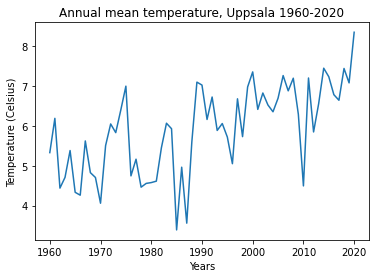

In [5]:
plt.figure(1)  # This will open a figure 1. Keep this
plt.plot(years,temp)
plt.xlabel('Years')
plt.ylabel('Temperature (Celsius)')
plt.title('Annual mean temperature, Uppsala 1960-2020')
plt.show()


### 2. Curve Fitting

To investigate the trends in the data, we will use the numpy.polynomial package to fit polynomials of different degrees to our data. This is done using the method of least squares, which finds the polynomial of the specified degree that minimizes the sum of the squares of the errors.

_1.5) Import the required package by running the cell below. Then, fit a linear polynomial (degree 1) to the data. What polynomial provides the best fit? Print the coefficients._

Hint: If you have some observations y given x, you can fit a first degree polynomial to this data using the command `p = Polynomial.fit(x, y, deg=1, window=[a,b])`. The second argument specifies the degree of the polynomial you wish to fit to the data, and the last argument specifies the domain (in this case [1960, 2020]) The best fit polynomial of the specified degree is then stored by its coefficients in the polynomial object p. Print the polynomial object to inspect the coefficients. 

In [7]:
from numpy.polynomial import Polynomial

In [8]:
p1 = Polynomial.fit(years,temp, deg=1, window=[1960,2020]) 
print(p1)

-75.15672441 + 0.04073172·x


_1.6) Plot the best fit together with the original data, with the original data plotted as a scatter plot. Does a first degree polynomial fit manage to capture the trends in the data?_

Hint: You can plot scattered data using `plt.plot(x, y, '*')`. Plot the polynomial you fitted in task 1.5) following the procedure you learned in the previous part of the lab, i.e. by first constructing a vector with a reasonable number of points on the x-axis, evaluating the polynomial in these points and storing the result in a variable that you can plot using `plt.plot`. 

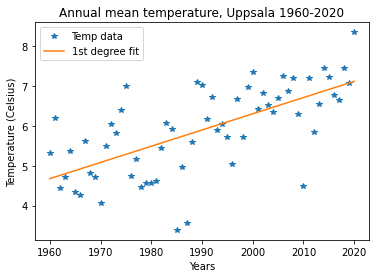

In [10]:
N = 200
x = np.linspace(1960,2020,N)
y = p1(x)
plt.figure(2)
# Enter your plotting code here
plt.plot(years,temp, '*',label='Temp data')
plt.plot(x,y,label='1st degree fit')
plt.xlabel('Years')
plt.ylabel('Temperature (Celsius)')
plt.title('Annual mean temperature, Uppsala 1960-2020')
plt.legend()
plt.show()

_1.7) Now, fit a 2nd (quadratic) and 3rd degree (cubic) polynomial to the data and plot the resulting polynomials in separate figures together with the original data. Do these fits capture the trends in the data? Which fit would you choose?_

2nd degree p_2= 1916.25390376 - 1.96084268·x + 0.00050291·x²
3rd degree p_3= 145499.65030176 - 218.43855312·x + 0.10929078·x² - (1.82224249e-05)·x³


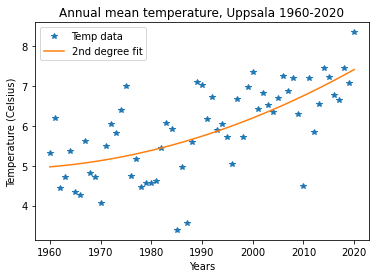

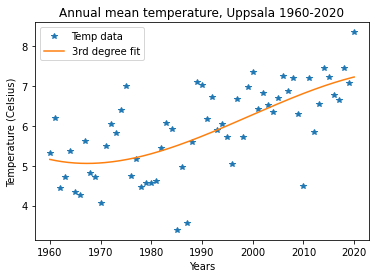

In [11]:
p2 = Polynomial.fit(years,temp, deg=2, window=[1960,2020])
p3 = Polynomial.fit(years,temp, deg=3, window=[1960,2020])
print('2nd degree p_2=',p2)
print('3rd degree p_3=',p3)
N = 200
x = np.linspace(1960,2020,N)
y2 = p2(x)
y3 = p3(x)
plt.figure(3)
# Enter your plotting code here
plt.plot(years,temp, '*',label='Temp data')
plt.plot(x,y2,label='2nd degree fit')
plt.xlabel('Years')
plt.ylabel('Temperature (Celsius)')
plt.title('Annual mean temperature, Uppsala 1960-2020')
plt.legend()
plt.show()
plt.figure(4)
plt.plot(years,temp, '*',label='Temp data')
plt.plot(x,y3,label='3rd degree fit')
plt.xlabel('Years')
plt.ylabel('Temperature (Celsius)')
plt.title('Annual mean temperature, Uppsala 1960-2020')
plt.legend()
plt.show()

_1.8) Fit a 8th and a 28th degree polynomial to the data and plot the results. What do you observe? High polynomial degrees often lead to oscillations between the data
points. Therefore, high-degree polynomial fittings are often avoided. Do you see why?_

Hint: If you want to save a plot you create to view later or use in a report, you can use the command plt.savefig('filename.png'), with an appropriate filename, after the plot commands. 

/opt/conda/lib/python3.8/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


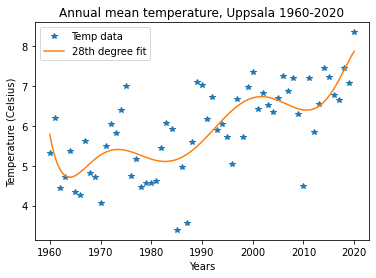

In [12]:
p28 = Polynomial.fit(years,temp, deg=28, window=[1960,2020])
N = 200
x = np.linspace(1960,2020,N)
y28 = p28(x)
plt.plot(years,temp, '*',label='Temp data')
plt.plot(x,y28,label='28th degree fit')
plt.xlabel('Years')
plt.ylabel('Temperature (Celsius)')
plt.title('Annual mean temperature, Uppsala 1960-2020')
plt.legend()
plt.show()

<p>
High polynomial degrees are avoided for different reasons, e.g. the often lead to oscillations between the data points. Also, they don't really express the trend in the data. You might also get warning about 'poorly conditioned' problem, which might lead to serious loss of accuracy. We will explain 'condition' in the part 2 of this lab.</p>   
<p><b>If you would like to save a plot</b> for later use, for example in a report, use the command <code>plt.savefig('filename.png')</code>, with an appropriate filename, after the plot commands.
    </p>

### 3. Global Warming Analysis

It is known that the temperature of the Earth has risen in recent years. Is it possible to see that trend also in Uppsala? To investigate this, we will look at a larger part of the available temperature observations, dating back to year 1800. You have access to the average annual temepratures in the txt-file tempAverage1800_2020.txt. The data before the 19th century is not as reliable as more recent data, so we focus on the 19th century and onwards in our analysis. 

_1.9) Load the txt-file and plot the temperature as a function of time. Can you see an increase in temperature in recent years? Are signs of the global warming visible in the data? Do a least squares fitting and investigate a few polynomial degrees. Which one do you think is the best for showing the trend in the data?_

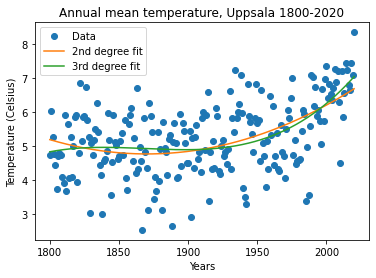

In [13]:
TempDataBig = np.loadtxt('tempAverage1800_2020.txt', usecols=(0,1))
yearsBig = TempDataBig[:,0]
tempBig = TempDataBig[:,1]
p2 = Polynomial.fit(yearsBig,tempBig, deg=2, window=[1800,2020])
p3 = Polynomial.fit(yearsBig,tempBig, deg=3, window=[1800,2020])

N = 500
x = np.linspace(1800,2020,N)
y2 = p2(x)
y3 = p3(x)
plt.figure(1)
plt.plot(yearsBig,tempBig,'o', label='Data')
plt.plot(x,y2,label='2nd degree fit')
plt.plot(x,y3,label='3rd degree fit')
plt.xlabel('Years')
plt.ylabel('Temperature (Celsius)')
plt.title('Annual mean temperature, Uppsala 1800-2020')
plt.legend()
plt.show()